In [ ]:
import gym

In [ ]:
env = gym.make("FrozenLake-v0")

In [ ]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
print(env.observation_space)

Discrete(16)


In [ ]:
print(env.action_space)

Discrete(4)


In [ ]:
print(env.P[0][2])

[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]


In [ ]:
print(env.P[3][1])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 3, 0.0, False)]


# **Generating an Episode in Gym Environment**

In [ ]:
state = env.reset()

In [ ]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
env.step(1)

(4, 0.0, False, {'prob': 0.3333333333333333})

In [ ]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


In [ ]:
(next_state, reward, done, info) = env.step(1)

In [ ]:
next_state

8

In [ ]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


In [ ]:
random_action = env.action_space.sample()

In [ ]:
next_state, reward, done, info = env.step(random_action)

In [ ]:
next_state

9

In [ ]:
info

{'prob': 0.3333333333333333}

## **New 20 Episodes**

In [ ]:
import gym

In [ ]:
env = gym.make("FrozenLake-v0")

In [ ]:
state = env.reset()

In [ ]:
print('Time Step 0 : ')

Time Step 0 : 


In [ ]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
num_timesteps = 20

for t in range(num_timesteps):
  random_action = env.action_space.sample()

  new_state, reward, done, info = env.step(random_action)
  print('Time Step {}'.format(t+1))

  env.render()

  if done:
    break

Time Step 1
  (Up)
SFFF
FHFH
FFFH
HFFG
Time Step 2
  (Right)
SFFF
FHFH
FFFH
HFFG


# **Classic control environments**

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

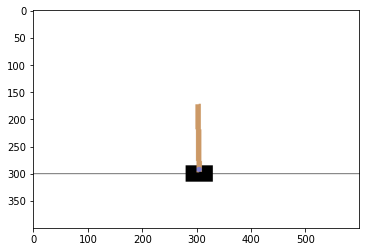

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

In [ ]:
env.close()

In [ ]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [ ]:
print(env.observation_space)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [ ]:
print(env.reset())

[-0.04449878 -0.0160267  -0.03280253 -0.02245425]


In [ ]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [ ]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [ ]:
print(env.action_space)

Discrete(2)


# **Cart Pole Balancing with Random Policy**

In [ ]:
import gym
env = gym.make('CartPole-v0')

Set the Number of Episodes and Number of Time Steps in the Episodes:

In [ ]:
num_episodes = 100
num_timesteps = 50

In [ ]:
# for each episodes 
for i in range(num_episodes):

  # set the Return to 0
  Return = 0
  # initialize the state by reseting the environment
  state = env.reset()

  # for each step in the episode
  for t in range(num_timesteps):
    # render the time steps 
    prev_screen = env.render('rgb_array')
    plt.imshow(prev_screen)

    # randomly select an action by sampling from the environment 
    random_action = env.action_space.sample()

    # perform the randomly selected action
    next_state, reward, done, info = env.step(random_action)

    # update the return 
    Return = Return + reward 

    # if the next state is a terminal state then end the episode 
    if done:
      break

  # for every 10 episodes, print the return (sum of rewards)
  if i % 10==0:
    print('Episodes: {}, Return: {}'.format(i, Return))

    

Episodes: 0, Return: 42.0
Episodes: 10, Return: 41.0
Episodes: 20, Return: 18.0
Episodes: 30, Return: 50.0
Episodes: 40, Return: 21.0
Episodes: 50, Return: 29.0
Episodes: 60, Return: 18.0
Episodes: 70, Return: 13.0
Episodes: 80, Return: 24.0
Episodes: 90, Return: 14.0
Error in callback <function flush_figures at 0x7fe355305440> (for post_execute):


KeyboardInterrupt: ignored

Close the Environment

In [ ]:
env.close()

NameError: ignored

# **An Agent Playing the Atari Tenis Game**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!python -m atari_py.import_roms /content

copying tennis.bin from /content/Tennis - Le Tennis (1981) (Activision, Alan Miller) (AG-007, CAG-007) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/tennis.bin


In [ ]:
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet



Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 71kB 3.5MB/s 


In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
env = gym.make('Tennis-v0')

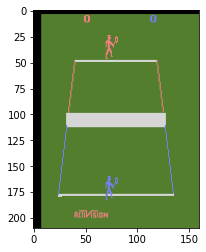

In [ ]:
prev_screen = env.render('rgb_array')
plt.imshow(prev_screen)

In [ ]:
num_episodes = 100
num_timesteps = 50

In [ ]:
for i in range(num_episodes):
  Return = 0
  state = env.reset()
  for t in range(num_timesteps):
    env.render()
    random_action = env.action_space.sample()
    next_state, reward, done, info = env.step(random_action)
    Return = Return + reward 
    if done:
      break

  if i % 10 == 0:
    print('Episode: {}, Return: {}'.format(i, Return))

env.close()

Episode: 0, Return: -1.0
Episode: 10, Return: -1.0
Episode: 20, Return: -1.0
Episode: 30, Return: -1.0
Episode: 40, Return: -1.0
Episode: 50, Return: -1.0
Episode: 60, Return: 0.0
Episode: 70, Return: 0.0
Episode: 80, Return: -1.0
Episode: 90, Return: 0.0


## **Recording the Episode**

In [ ]:
env = gym.make('Tennis-v0')
#Record the game
env = gym.wrappers.Monitor(env, 'recording', force=True)
env.reset()

for _ in range(5000):

  env.render()
  action = env.action_space.sample()
  next_state, reward, done, info = env.step(action)

  if done:
    break

env.close()